# Chatbot programmieren

| Sätze | Labels | Antwort |
|-------|--------|---------|
| Hallo | Begrüßung | Hallo! Wie kann ich Ihnen helfen? |
| Tschüss | Verabschiedung | Auf Wiedersehen! |
| Danke | Dank | Gern geschehen! |

Chatbot erkennt label eines vom User eingegebenen Satzes und sucht dann eien zufällige Antwort aus dem jeweiligen Label.

Mit Machinen Learning (Klassifizuerungsalgorithmus) soll ein unbekannter Satz nach dem Training in eine der verfügbaren Kategorien (Labels) eingeteilt werden.


1. Machine Learning
- Installiere pandas und scikit-learn        
- Jeder Satz im Datensatz wird in ein Bag of Words verwandelt
- Der ML Algorithmus wird mit den Daten im BoW Format und den dazugehörigen Labels trainiert.
- Teste den Algorithmus indem du über die input-Funktion im Terminal einen Satz eingibst, dieser in ein Bow verwandelt und dann kategorisiert mit dem ML Algorithmus.

2. Chatbot
- Ein Satz aus dem Terminal User Input wird kategorisiert.
- Aus der responses Spalte wird eine zufällige Antwort mit der passenden Kategorie ausgewählt und ausgegeben.

Imports:

In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer

In [144]:
# %pip install google

In [145]:
import tensorflow as tf
from tensorflow import keras

Functions:

In [146]:
def bow(vocabulary:list, sentence:str, )-> list:
    '''Generates a bow-array:list[int] for a given sentence:str based on a given vocabulary:list[str] '''
    bagOfWords = []
    for word in vocabulary:
        if word in sentence.lower():
            bagOfWords.append(1)
        else:
            bagOfWords.append(0)
    return bagOfWords

def bow_list(vocabulary:list, sentences:list[str])->list[int]:
    ''' Generates a list of bow-arrays for list of sentences based on a given vocabulary:list[str] '''
    bow_list:list[int] = []
    for sentence in sentences:
        bow_list.append(bow(vocabulary, sentence))
    return bow_list

def remove_chars(chars, sentences):
    ''' Removes chars from sentences:list[str] and return "cleaned" sentences '''
    clean_sentences = []
    for sentence in sentences:
        for char in chars:
            if char in sentence:
                sentence = sentence.replace(char, '')
        sentence = sentence.strip().lower()
        clean_sentences.append(sentence)
    return clean_sentences

def create_vocabulary(sentences):
    ''' Creates array of words (vocabulary) based on given sentences '''
    words_list = []
    for sentence in sentences:
        words = sentence.split(" ")
        for word in words:
            words_list.append(word)
    vocabulary = list(set(words_list))
    # vocabulary = words_list
    return vocabulary

Read CSV-Training data

In [147]:
df = pd.read_csv('ChatbotTraining.csv',
                sep=',',              # Specify separator (default is comma)
                encoding='utf-8',     # Specify encoding
                header=0)
print(df['tag'].shape)
print(df['patterns'].shape)

(373,)
(373,)


Labels / output data:

In [148]:
# labels / output data
labels = df['tag'].values.tolist()
le = LabelEncoder()
y = le.fit_transform(labels)
print(f"Labels: {y}")
print(f"Classes: {le.classes_}")

Labels: [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 7
 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0]
Classes: ['age' 'goodbye' 'greeting' 'help' 'joke' 'name' 'purpose' 'thanks']


Input data: Preparation and cleaning

In [149]:
# input data
sentences = df['patterns'].values.tolist()
# remove chars from sentences
chars = '!?.\','
sentences = remove_chars(chars, sentences)


count_vec = CountVectorizer()
X = count_vec.fit_transform(sentences,)
print(X.shape, X.toarray())
print(count_vec.get_feature_names_out())

(373, 356) [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
['able' 'about' 'accomplish' 'achieve' 'actions' 'actual' 'adios' 'advice'
 'afternoon' 'again' 'age' 'ai' 'aiming' 'always' 'amazing' 'an' 'and'
 'any' 'appreciate' 'appreciated' 'approximate' 'are' 'around'
 'articulate' 'as' 'ask' 'asking' 'assist' 'assistance' 'at' 'be' 'been'
 'behind' 'being' 'believe' 'best' 'better' 'birth' 'bit' 'blank'
 'blessed' 'bon' 'bones' 'born' 'bottom' 'break' 'brighten' 'buddy' 'but'
 'by' 'bye' 'call' 'can' 'cant' 'care' 'catch' 'cheerio' 'chuckle'
 'clarify' 'come' 'context' 'could' 'crack' 'cracks' 'created' 'creation'
 'curious' 'current' 'date' 'day' 'deeply' 'describe' 'did' 'didnt'
 'difference' 'difficulty' 'direction' 'do' 'doing' 'dont' 'drawing'
 'driving' 'earlier' 'easy' 'efforts' 'elucidate' 'end' 'endeavor'
 'enough' 'entertain' 'evening' 'everyone' 'everything' 'excuse' 'existed'
 'expertise' 'explain' 'far

Split data into train and test data

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X.toarray(), y, test_size=0.2, stratify=y, random_state=42)
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")

X_train: (298, 356), y_train: (298,)
X_test: (75, 356), y_test: (75,)


Model training:

In [151]:
# Ensure X_train is a NumPy array
X_train = np.array(X_train)

tf_chatbot = tf.keras.Sequential()
tf_chatbot.add(tf.keras.layers.Dense(356, activation='relu', input_shape=(X_train.shape[1],))) # input layer
tf_chatbot.add(tf.keras.layers.Dense(356, activation='relu')) # hidden layer
tf_chatbot.add(tf.keras.layers.Dense(len(set(y)), activation='softmax')) # output layer

C:\Users\weber\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Compile TF-Model

In [152]:
tf_chatbot.compile(optimizer='adam',                        # standard for binary classification
                   loss='sparse_categorical_crossentropy',  # adaptive learning rate optimizer
                   metrics=['accuracy'])                    
tf_chatbot.summary()


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                │ (None, 356)            │       127,092 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 356)            │       127,092 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 8)              │         2,856 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 257,040 (1004.06 KB)

 Trainable params: 257,040 (1004.06 KB)

 Non-trainable params: 0 (0.00 B)

Train TF-Chatbot-Model

In [153]:
tf_chatbot.fit(X_train, y_train, batch_size=8, epochs=10) # fit model to data)

Epoch 1/10


38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.3405 - loss: 1.8980
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8651 - loss: 0.7668
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9728 - loss: 0.1833
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 0.0397
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 1.0000 - loss: 0.0199
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 0.0084
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 0.0061
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 0.0044
Epoch 9/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 1.0000 - loss: 0.0037
Epoch 10/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 0.0026


Genauigkeit der Traningsdaten: Wie gut bildet das Modell die Trainingsdaten ab?

In [154]:
_, accuracy = tf_chatbot.evaluate(X_train, y_train)
print(f"Accuracy: {accuracy * 100:.2f}%")


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.0021  
Accuracy: 100.00%


Model Predctions

In [ ]:
# Evaluate the model on the test set
y_pred = tf_chatbot.predict(X_test) # predicts the class probabilities for each sample
predicted_classes = np.argmax(y_pred, axis=1)  # Get the index of the highest probability for each sample
tag_predict = le.inverse_transform(predicted_classes)  # Convert class indices back to original labels
print(f"Predicted tags: {tag_predict}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Predicted tags: ['name' 'age' 'name' 'greeting' 'greeting' 'greeting' 'purpose' 'age'
 'greeting' 'goodbye' 'goodbye' 'greeting' 'name' 'goodbye' 'goodbye'
 'greeting' 'help' 'help' 'greeting' 'goodbye' 'age' 'joke' 'greeting'
 'name' 'help' 'purpose' 'joke' 'purpose' 'greeting' 'greeting' 'greeting'
 'greeting' 'greeting' 'greeting' 'greeting' 'greeting' 'age' 'joke'
 'greeting' 'greeting' 'goodbye' 'age' 'greeting' 'age' 'goodbye'
 'goodbye' 'greeting' 'help' 'joke' 'greeting' 'help' 'purpose' 'thanks'
 'greeting' 'joke' 'greeting' 'greeting' 'goodbye' 'greeting' 'greeting'
 'thanks' 'greeting' 'greeting' 'purpose' 'thanks' 'help' 'help' 'name'
 'thanks' 'greeting' 'goodbye' 'greeting' 'greeting' 'thanks' 'goodbye']


In [157]:
# accuracy on test set
accuracy = accuracy_score(y_test, predicted_classes)
print(f"Accuracy = {accuracy * 100:.2f}%")
print(classification_report(y_test, predicted_classes, target_names=le.classes_))



Accuracy = 88.00%
              precision    recall  f1-score   support

         age       0.83      1.00      0.91         5
     goodbye       0.91      0.71      0.80        14
    greeting       0.84      1.00      0.91        26
        help       0.86      1.00      0.92         6
        joke       1.00      0.83      0.91         6
        name       1.00      0.83      0.91         6
     purpose       1.00      0.83      0.91         6
      thanks       0.80      0.67      0.73         6

    accuracy                           0.88        75
   macro avg       0.90      0.86      0.87        75
weighted avg       0.89      0.88      0.88        75



[[ 5  0  0  0  0  0  0  0]
 [ 0 10  3  0  0  0  0  1]
 [ 0  0 26  0  0  0  0  0]
 [ 0  0  0  6  0  0  0  0]
 [ 0  0  1  0  5  0  0  0]
 [ 0  0  0  1  0  5  0  0]
 [ 1  0  0  0  0  0  5  0]
 [ 0  1  1  0  0  0  0  4]]


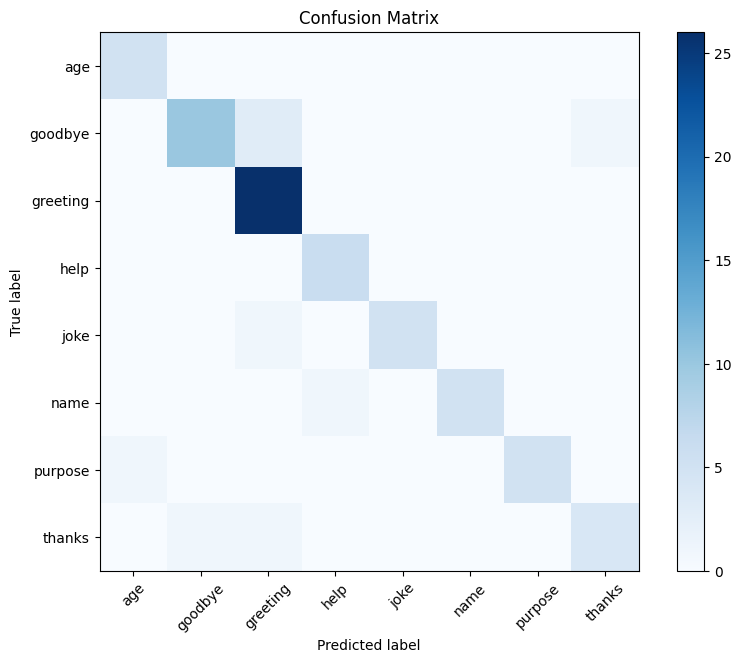

In [158]:
# Plot confusion matrix
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize=(10, 7))
plt.title('Confusion Matrix')
plt.xticks(np.arange(len(le.classes_)), le.classes_, rotation=45)
plt.yticks(np.arange(len(le.classes_)), le.classes_)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()


print(cm)


Testing chatbot model - Accuracy:

In [159]:
# Evaluate the model on the test data
loss, accuracy_test = tf_chatbot.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy_test * 100:.2f}%")

# Predict the classes for the test data
y_pred_classes = np.argmax(tf_chatbot.predict(X_test), axis=1)
# Display y_pred_classes and y_test side by side as columns
comparison = pd.DataFrame({'Predicted': y_pred_classes, 'Actual': y_test})
print(comparison)


Test Accuracy: 88.00%
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
    Predicted  Actual
0           5       5
1           0       0
2           5       5
3           2       1
4           2       2
..        ...     ...
70          1       1
71          2       2
72          2       2
73          7       7
74          1       1

[75 rows x 2 columns]


Saving Model

In [160]:
# save model
# tf.keras.models.save_model(tf_chatbot, 'chatbot_tfmodelSeq.keras') # save model